<a href="https://colab.research.google.com/github/carlossawyerr/Spectographic-Analysis-Of-Musical-Sounds/blob/master/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install librosa

In [0]:
!git clone https://github.com/parulnith/Music-Genre-Classification-with-Python.git

Cloning into 'Music-Genre-Classification-with-Python'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [0]:
cd Music-Genre-Classification-with-Python/


/content/Music-Genre-Classification-with-Python


In [0]:
ls

'Audio Analysis in Python.ipynb'    README.md
 data.csv                           T08-violin.wav
 Music_genre_classification.ipynb   tone_220.wav


In [0]:
import librosa

audio_path = '../Music-Genre-Classification-with-Python/T08-violin.wav'
x , sr = librosa.load(audio_path)

In [0]:
print(type(x), type(sr))

print(x.shape, sr)


<class 'numpy.ndarray'> <class 'int'>
(396688,) 22050


In [0]:
import IPython.display as ipd
ipd.Audio(audio_path)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [0]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [0]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [0]:
librosa.output.write_wav('example.wav', x, sr)

In [0]:
audio_path_example = '../Music-Genre-Classification-with-Python/example.wav'
import IPython.display as ipd
ipd.Audio(audio_path_example)

In [0]:
#Creating an audio signal
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)

In [0]:
ls

'Audio Analysis in Python.ipynb'    README.md
 data.csv                           T08-violin.wav
 example.wav                        tone_220.wav
 Music_genre_classification.ipynb


# **Zero Crossing Rate** - Rate of sign changes along the signal

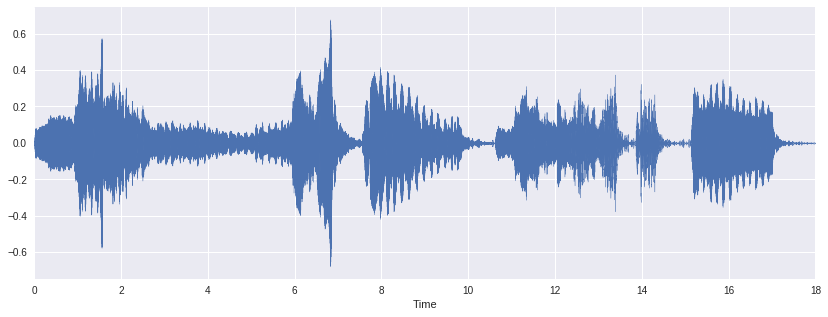

In [0]:
# Load the signal
x, sr = librosa.load('../Music-Genre-Classification-with-Python/T08-violin.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

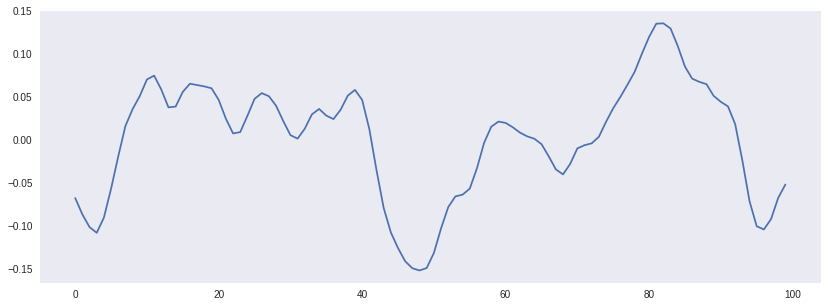

In [0]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [0]:
# Number of Crossings
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

6


# Spectral Centroid - Center of Mass of the Sound

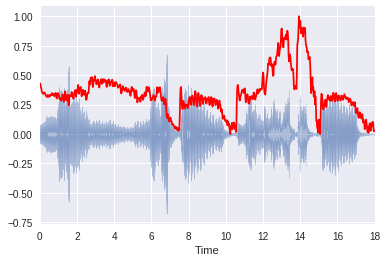

In [0]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

# Spectral RollOff - Shape of the Signal

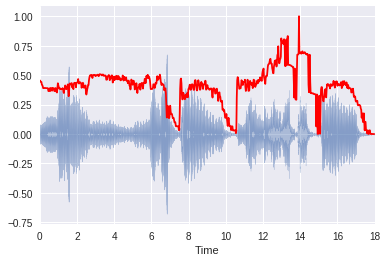

In [0]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

# **Mel frequency cepstral coefficients (MFCCs) **

In [0]:
x, fs = librosa.load('../Music-Genre-Classification-with-Python/tone_220.wav')
librosa.display.waveplot(x, sr=sr)

![alt text](https://cdn-images-1.medium.com/max/1600/1*kLln6ejJJsTDn9B0zLALUA.png)

In [0]:
ls

'Audio Analysis in Python.ipynb'    README.md
 data.csv                           T08-violin.wav
 example.wav                        tone_220.wav
 Music_genre_classification.ipynb


In [0]:
cd Music-Genre-Classification-with-Python/

/content/Music-Genre-Classification-with-Python
